# 🏡 **Unlocking the Secrets of Mortgages: A Journey into Homeownership and Beyond!**

![Home Image](https://i.ibb.co/DkfZnfD/image.png)

Welcome to the fascinating world of Mortgage Data, where numbers and trends come to life, telling the captivating story of Default Prediction, Customer Segmentation, and Property Purchase Trends. 🚀


### Project Name : Mortgage Prices Segmentation 
### Authors
- [Ahmed Abdullah](https://github.com/ahmedembeddedx)
- [Zaeem ul Islam](https://github.com/mightyflavor)


## 1 *Necessary Libraries*

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd
import seaborn as sns
import swifter
from scipy.stats import zscore
from scipy import stats
from pandas.plotting import scatter_matrix

## 2 *Loading Dataset & Head Entries*

In [193]:
data = pd.read_csv("dataset.csv", encoding="ISO-8859-1", low_memory=False)

In [194]:
data['Property Value Range'] = data['Property Value Range'].str.replace('$', '', regex=False)

In [195]:
data.head(5)

,First_Name,Last_Name,Address,City,County,State,Zip,Property Type,Phone,Gender,...,Property Purchased Year,Property Built,Property Value Range,Mortgage Amount In Thousands,Lender Name,Interest Type,Loan Type,Loan To Value,Home Value Mortgage File,Email
0,RHONDA,HALFPOP,731 S Mississippi Ave,Mason City,Cerro Gordo,IA,50401,S,6414230703,F,...,0,1976,"150,000 - 174,999",79,BANK OF AMERICA,U,Conventional,51,155335,NaN
1,ROBERT,BIRGE,503 Student Dr,Ogallala,Keith,NE,69153,S,3082849975,M,...,2012,1959,"125,000 - 149,999",143,US BK NATIONAL ASSN,U,Conventional,0,140094,NaN
2,HILARY,DOLAN,429 Moore Dr,Mount Holly,Burlington,NJ,8060,S,6095187632,F,...,2013,1926,"200,000 - 224,999",40,COMMERCE BK,U,Conventional,105,212437,NaN
3,DEBORAH,EMOND,46 Junction Rd,Malone,Franklin,NY,12953,S,5184830320,F,...,0,1920,"75,000 - 99,999",45,NORTH FRANKLIN FCU *OTHER,U,Conventional,52,87210,NaN
4,MARY,EDWARDS,11129 131st St,S Ozone Park,Queens,NY,11420,S,3475316801,F,...,1997,0,"350,000 - 399,999",100,NASSAU EDUCATORS FCU,U,Conventional,27,374555,NaN


## 3 *Data Preprocessing*

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   First_Name                    999996 non-null   object
 1   Last_Name                     999975 non-null   object
 2   Address                       1000000 non-null  object
 3   City                          1000000 non-null  object
 4   County                        1000000 non-null  object
 5   State                         1000000 non-null  object
 6   Zip                           1000000 non-null  int64 
 7   Property Type                 1000000 non-null  object
 8   Phone                         1000000 non-null  object
 9   Gender                        1000000 non-null  object
 10  Age                           1000000 non-null  int64 
 11  Property Purchased Year       1000000 non-null  int64 
 12  Property Built                1000000 non-n

In [197]:
data.describe(include="all")

,First_Name,Last_Name,Address,City,County,State,Zip,Property Type,Phone,Gender,...,Property Purchased Year,Property Built,Property Value Range,Mortgage Amount In Thousands,Lender Name,Interest Type,Loan Type,Loan To Value,Home Value Mortgage File,Email
count,999996,999975,1000000,1000000,1000000,1000000,1000000.000000,1000000,1000000,1000000,...,1000000.000000,1000000.000000,1000000,1000000.000000,1000000,1000000,1000000,1000000.000000,1.000000e+06,90905
unique,55928,204150,980375,11583,1530,51,NaN,3,1000000,3,...,NaN,NaN,20,NaN,41924,4,8,NaN,NaN,90848
top,MICHAEL,SMITH,PO Box 82,Houston,Los Angeles,CA,NaN,S,6414230703,M,...,NaN,NaN,"500,000 - 749,999",NaN,WELLS FARGO BK NA,U,Conventional,NaN,NaN,claramarine@aol.com
freq,17822,7510,16,8580,28601,121430,NaN,951281,1,466009,...,NaN,NaN,86355,NaN,64958,727689,842229,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,50353.348007,NaN,NaN,NaN,...,1716.699152,1784.453285,NaN,168.309944,NaN,NaN,NaN,66.596780,3.172268e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30018.322936,NaN,NaN,NaN,...,701.213214,583.796886,NaN,209.675384,NaN,NaN,NaN,38.756272,3.131883e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,...,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,27107.000000,NaN,NaN,NaN,...,1993.000000,1952.000000,NaN,70.000000,NaN,NaN,NaN,42.000000,1.481360e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,46256.000000,NaN,NaN,NaN,...,2003.000000,1977.000000,NaN,128.000000,NaN,NaN,NaN,68.000000,2.345820e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,78247.000000,NaN,NaN,NaN,...,2009.000000,1996.000000,NaN,220.000000,NaN,NaN,NaN,89.000000,3.799022e+05,NaN


### i. Dimension Reduction - I

In [198]:
columns_to_keep = [
    'State', #
    'Property Type', #
    'Gender', #
    'Age', #
    'Property Purchased Year', #
    'Property Built', #
    'Property Value Range', #
    'Mortgage Amount In Thousands', #
    'Lender Name', #
    'Interest Type', #
    'Loan Type', #
    'Loan To Value' # 
]

data = data[columns_to_keep]

In [199]:
memory_usage = data.memory_usage(deep=True).sum()

print(f"Memory usage of the DataFrame: {memory_usage / (1024**2):.2f} MB")

Memory usage of the DataFrame: 466.83 MB


### ii. Updating tuple conventions

In [200]:
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()

### iii. Removing Outliers (Z-Score Method)

In [201]:
def drop_outliers_dask(df, z_threshold=3):
    numeric_values = df.apply(pd.to_numeric, errors='coerce')
    z_scores = np.abs(stats.zscore(numeric_values))
    outlier_rows = (z_scores > z_threshold).any(axis=1)
    return df[~outlier_rows]

for i in range(0, 4):
    dask_data = dd.from_pandas(data, npartitions=4)
    dask_data_without_outliers = dask_data.map_partitions(drop_outliers_dask)
    data_without_outliers = dask_data_without_outliers.compute()
    data=data_without_outliers

## 4 *Data Cleaning*

The majority of essential data is missing in the form of NaN or NULL. In the case of categorical data, this isn't much of a problem since this data is easily replaceable and doesn't significantly affect the model. Most of the categorical and ordinal data are present. The challenge arises with numerical data such as years and values, where 20%-30% of the data is missing. This data is irreplaceable. Other continuous data, such as age and binary gender data, can be replaced. However, this leaves us with two options: either lose 20% of the data or retain it and maintain the overall data distribution.

After removing outiers and unncessary data, we have retained 74% of usable data

### i. Dropping Duplicates

In [202]:
data = data.drop_duplicates()

### ii. Removing null 'States'

In [203]:
data = data.dropna(subset=['state'])

### iii. Replacing 'Age' with average buyer age

In [204]:
median_age = data.loc[data['age'] >= 18, 'age'].median()
data['age'] = data['age'].apply(lambda x: median_age if x < 18 else x)
data['age'] = data['age'].astype(int)

### iv. Replacing 'Gender' with most occuring gender

In [205]:
mode_gender = data['gender'].mode().iloc[0]
data['gender'] = data['gender'].replace('U', mode_gender)

### v. Dropping 'Mortgage Price' with Undefined since it is most important variable

In [206]:
data = data[(data['mortgage_amount_in_thousands'] > 0) & (data['mortgage_amount_in_thousands'] < 500)]
data['mortgage_amount_in_thousands'] = data['mortgage_amount_in_thousands']

### vi. Dropping 'Build and Puchase Years' with to make data aligned

In [207]:
data = data[data['property_purchased_year'] >= 1940]
data = data[data['property_built'] >= 1940]

### vii. Dropping 'Loan Type' with Undefined

In [208]:
data = data[~data['loan_type'].isin(['W', 'Community Development Authority'])]

### viii. Transforming the range data of 'Property Value Range' from string to two seprate columns

In [209]:
data['property_value_range'] = data['property_value_range'].str.strip().str.replace(',', '')

In [210]:
data[['low_value_range', 'high_value_range']] = data['property_value_range'].str.split(' - ', expand=True)

data['low_value_range'] = pd.to_numeric(data['low_value_range'], errors='coerce')
data['high_value_range'] = pd.to_numeric(data['high_value_range'], errors='coerce')

data.drop('property_value_range', axis=1, inplace=True)

In [211]:
data = data.dropna(subset=['low_value_range']).copy()
data['low_value_range'] = data['low_value_range'].astype(int)
data = data[data['low_value_range'] <= 500000]

data = data.dropna(subset=['high_value_range']).copy()
data['high_value_range'] = data['high_value_range'].astype(int)
data = data[data['low_value_range'] <= 500000]

### ix. Preparing 'Lender Name' for the One-Hot Encoding by reducing columns

In [212]:
top_banks = data['lender_name'].value_counts().nlargest(10).index
data['lender_name'] = data['lender_name'].apply(lambda x: x if x in top_banks else 'unknown')

### x. Resetting the Indices

In [213]:
data = data.reset_index(drop=True)

## 5 *Data Distributions (Univariate Analysis)*

### i. Plotting Discrete and Continous Data

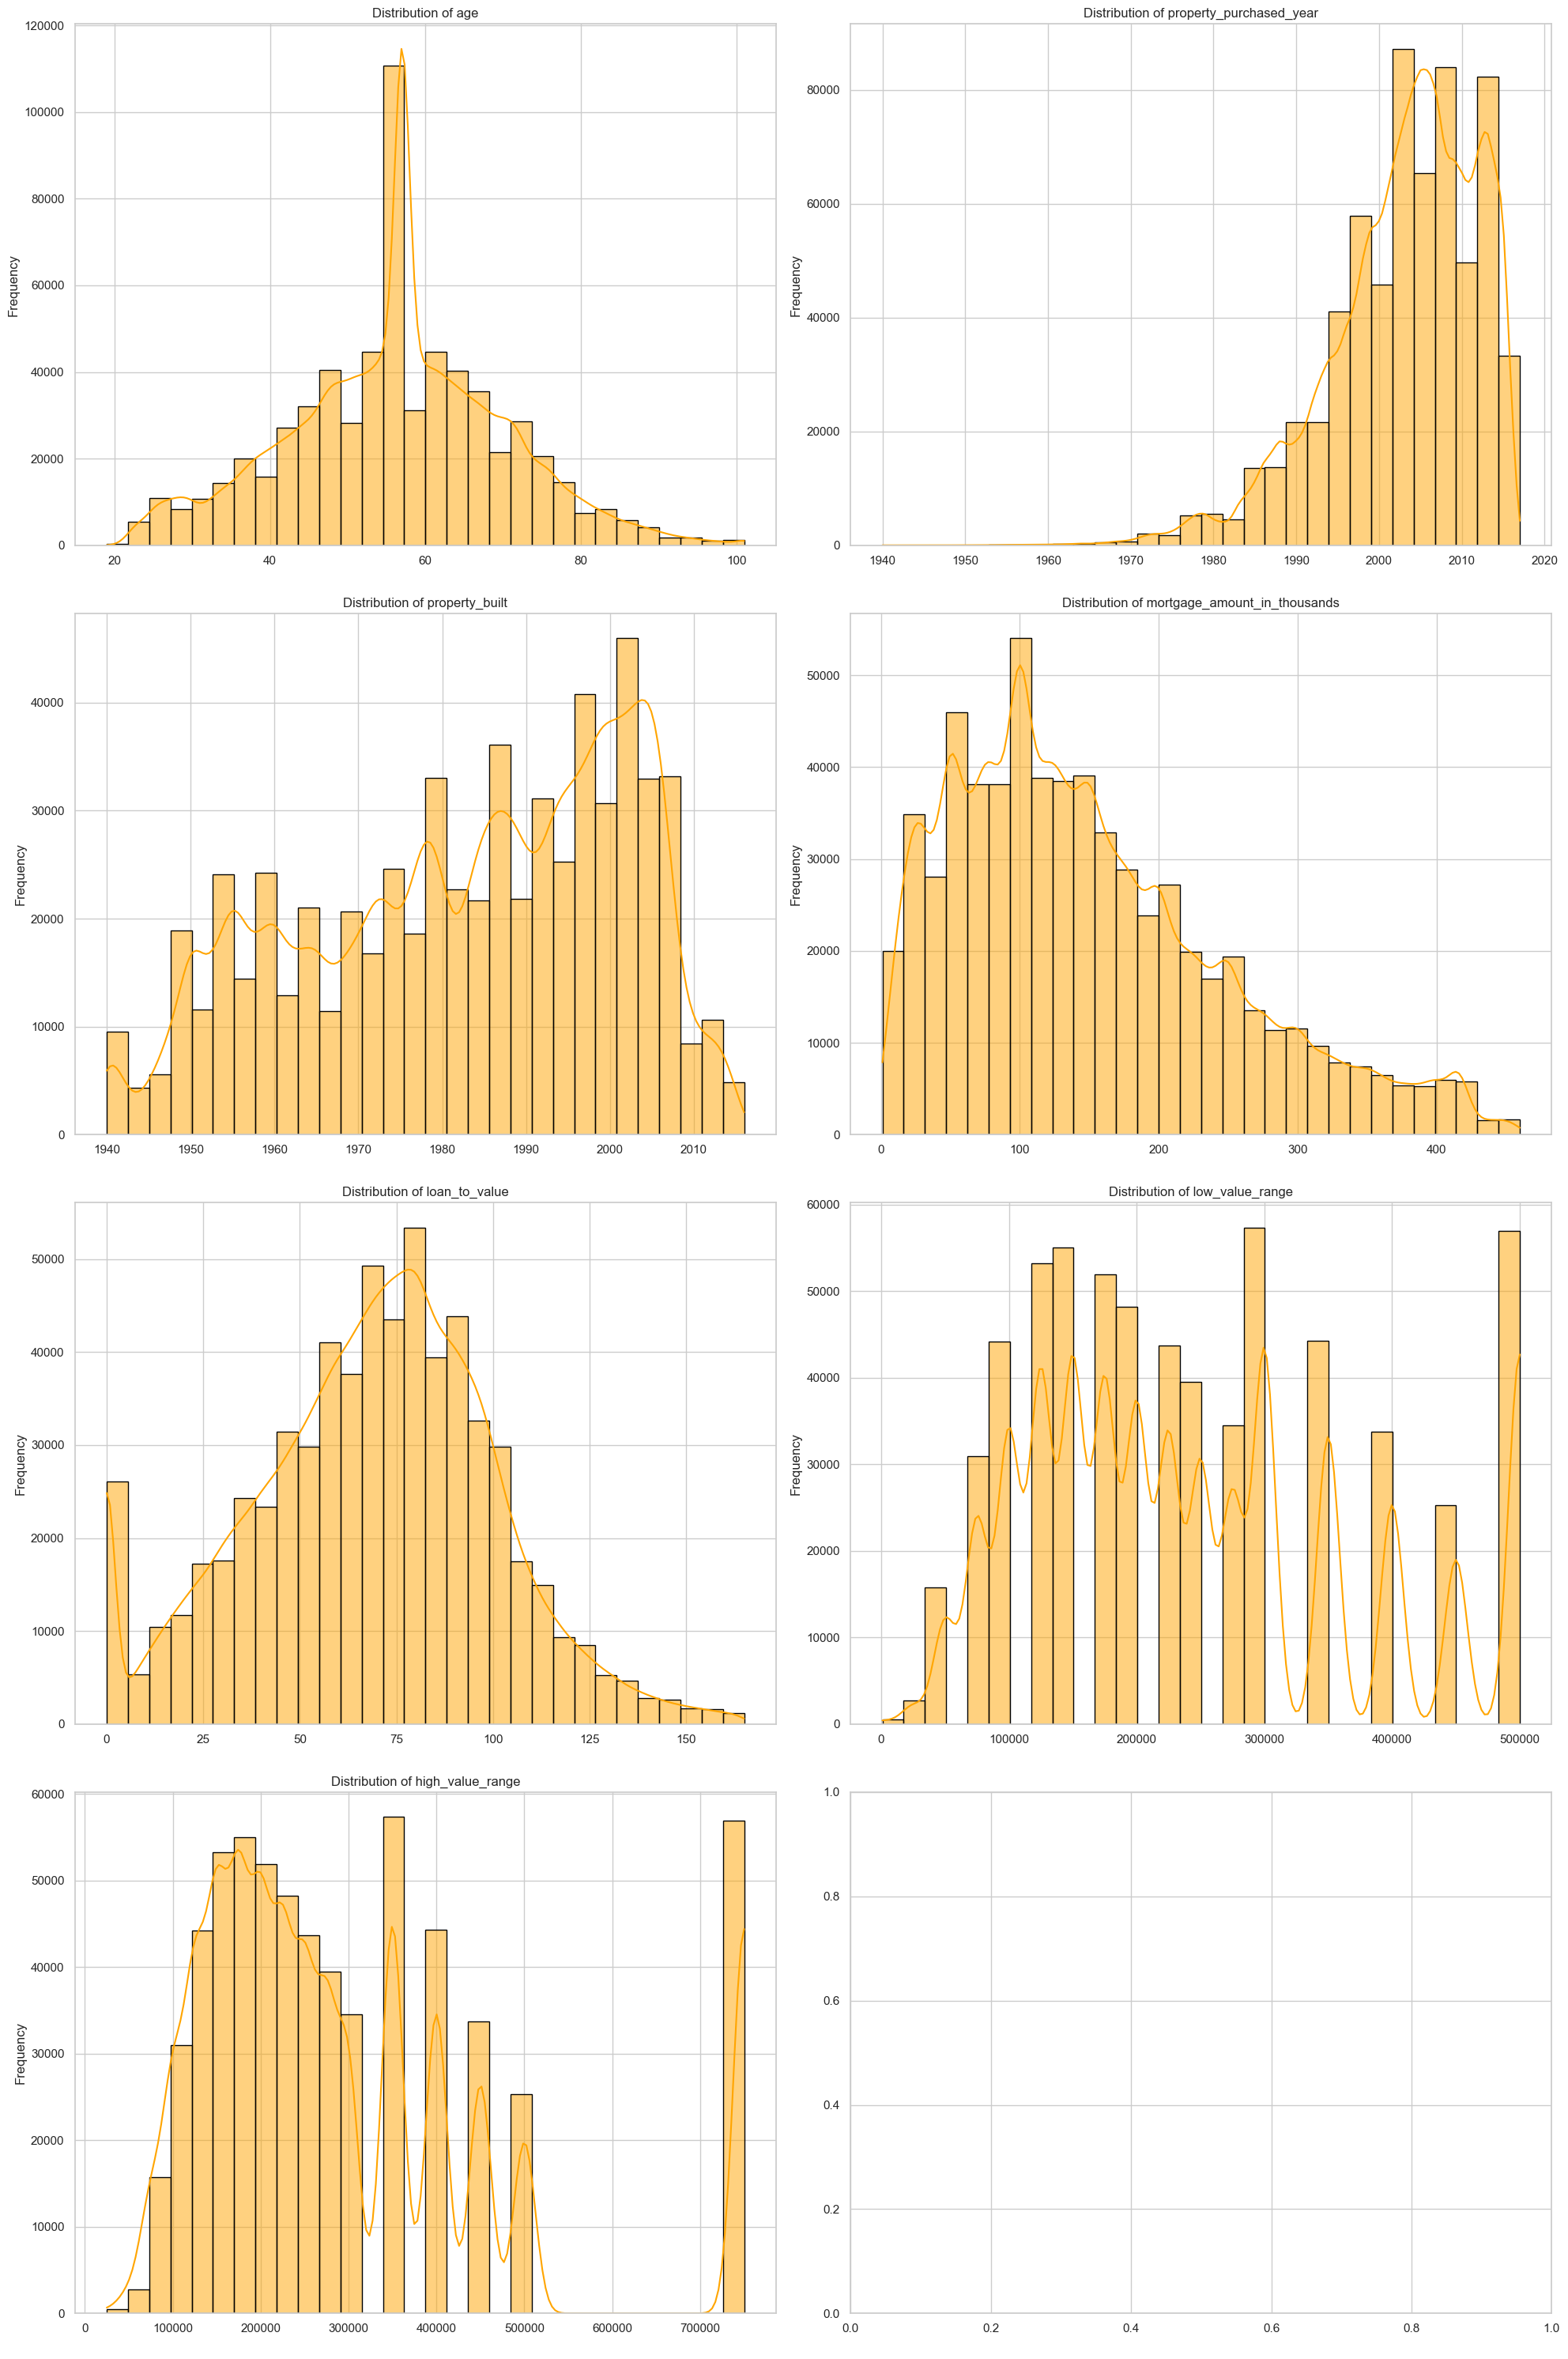

In [214]:
columns_to_keep = [
    'state', 'property_type', 'gender', 'age',
    'property_purchased_year', 'property_built',
    'mortgage_amount_in_thousands', 'lender_name', 'interest_type',
    'loan_type', 'loan_to_value', 'low_value_range', 'high_value_range'
]
filtered_data = data[columns_to_keep]

histogram_columns = [
    'age', 'property_purchased_year', 'property_built', 
    'mortgage_amount_in_thousands', 'loan_to_value', 'low_value_range', 
    'high_value_range'
]

num_rows = len(histogram_columns) // 2 + len(histogram_columns) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
axes = axes.flatten()

for i, column in enumerate(histogram_columns):
    sns.histplot(filtered_data[column], bins=30, kde=True, ax=axes[i], edgecolor='black', color='orange')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### Interpretations of the graphs

- **Age:** Properties are predominantly between 20 and 30 years old, with fewer exceeding 40 years.
- **Year Purchased:** Majority of purchases occurred between 2010 and 2020, with fewer before 2010.
- **Property Built Year:** Most properties were built between 1950 and 1970, fewer before 1950 or after 1970.
- **Mortgage Amount (in thousands):** Majority falls between 100,000 and 300,000, with fewer below 100,000 or above 300,000.
- **Loan-to-Value (LTV) Ratio:** Majority of LTV ratios are between 0.5 and 0.75, indicating a relatively low risk profile.
- **High Value Range:** Majority of Property Value Ranges (High) are between 0.1x10^7 and 0.3x10^7.
- **Low Value Range:** Majority of Property Value Ranges (Low) are between 0.1x10^6 and 0.3x10^6.


### ii. Plotting Categorical and Ordinal Data

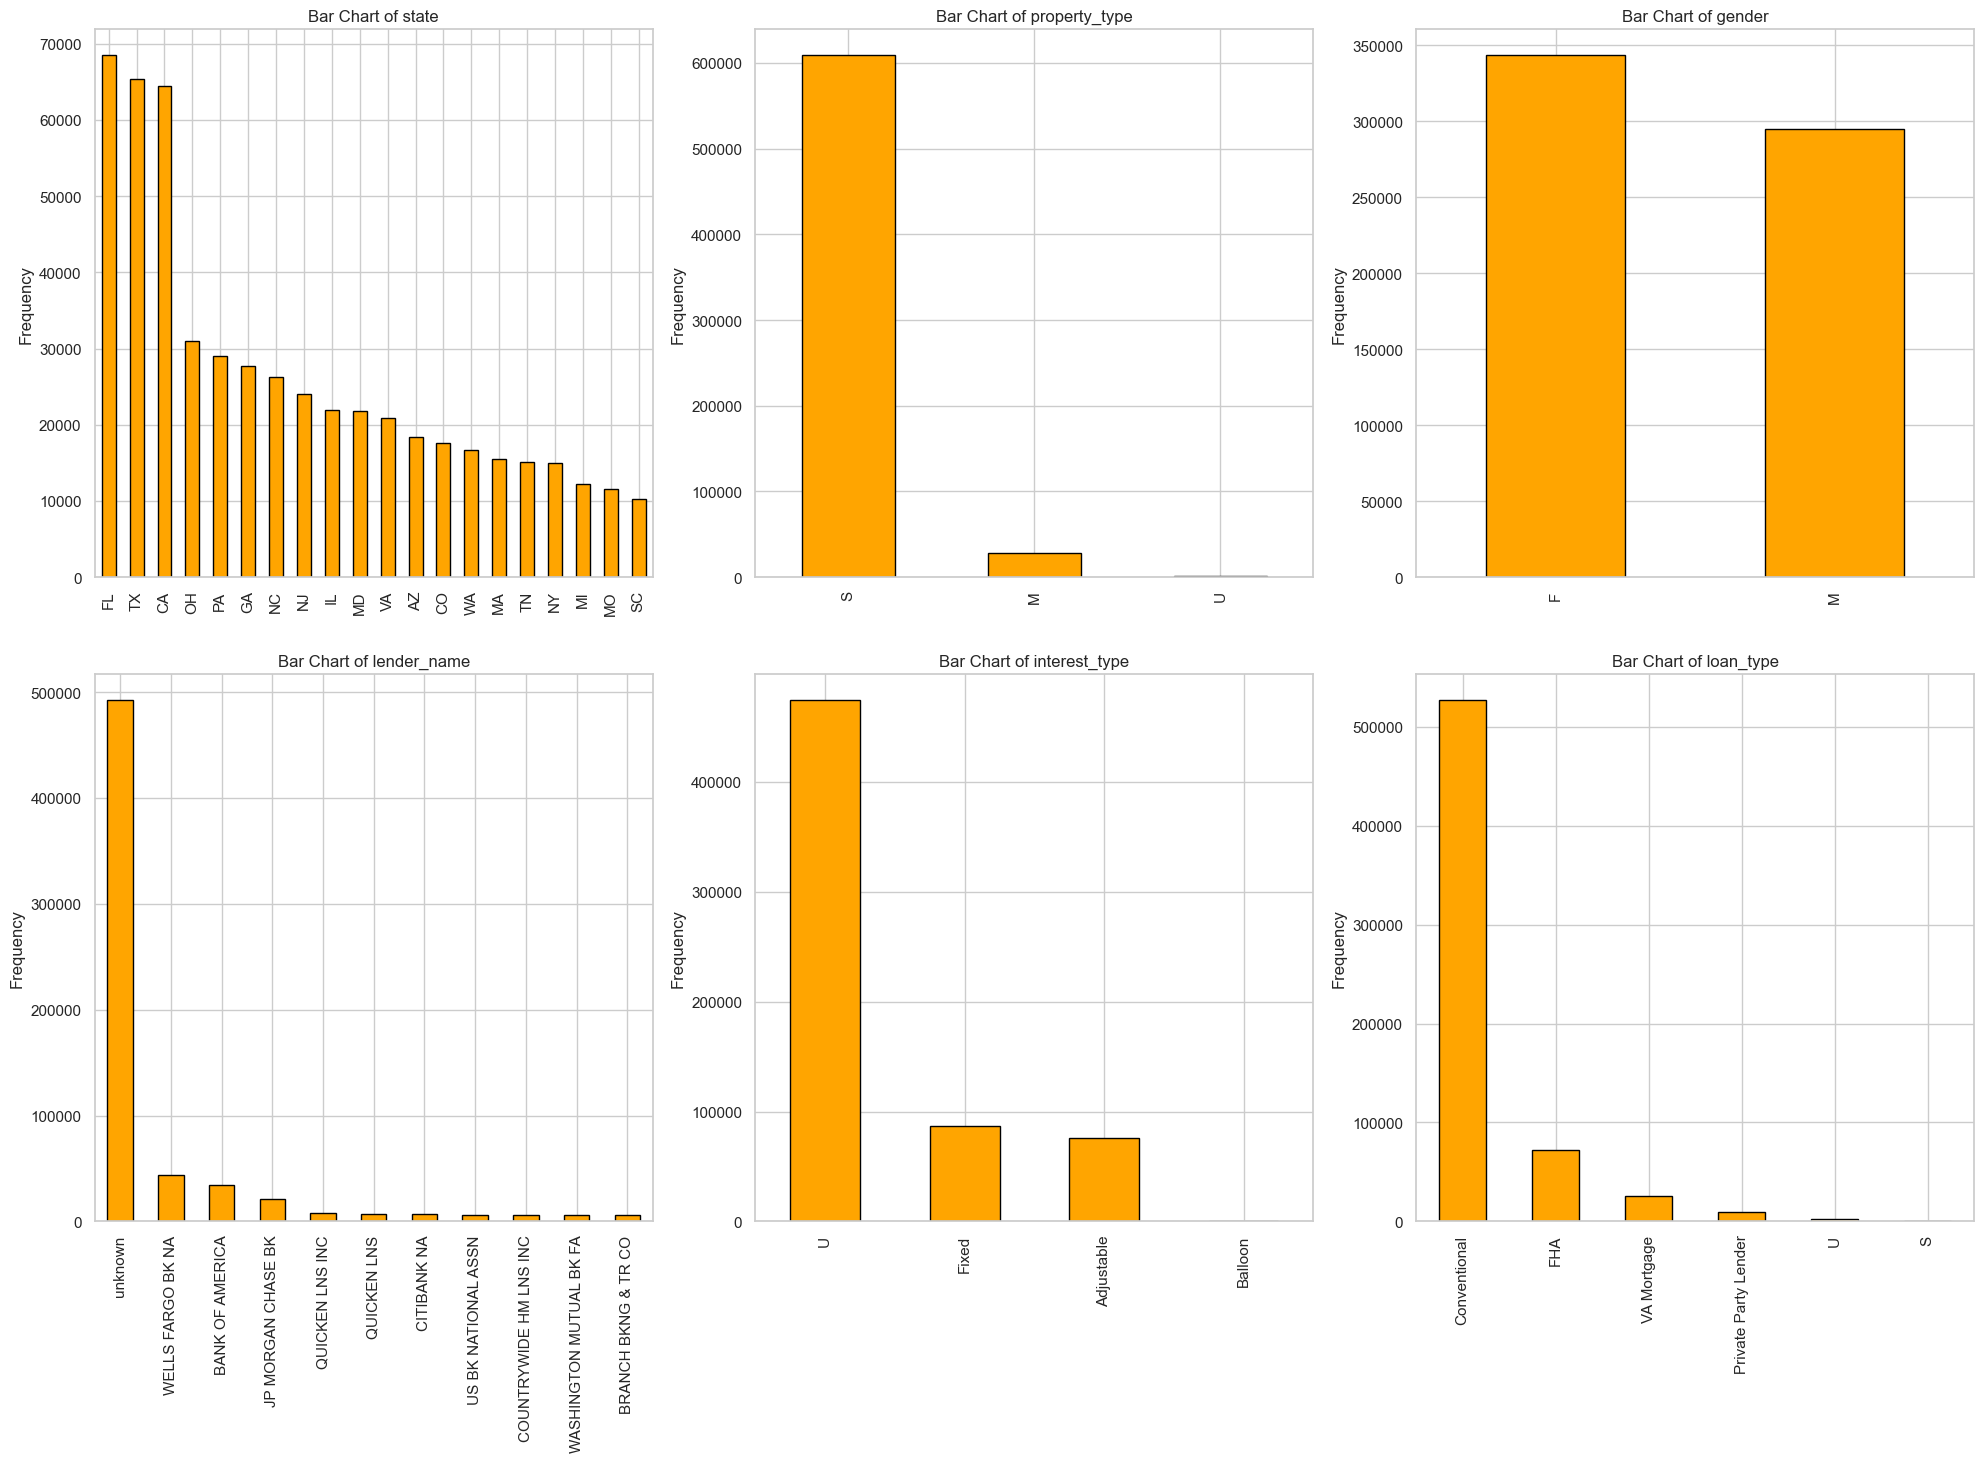

In [215]:
filtered_data = data[columns_to_keep]

bar_chart_columns = [
   'state', 'property_type', 'gender',
    'lender_name', 'interest_type', 'loan_type'
]

num_rows = 2
num_cols = len(bar_chart_columns) // num_rows + len(bar_chart_columns) % num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()

sampled_data = filtered_data

for i, column in enumerate(bar_chart_columns):
    top_values = sampled_data[column].value_counts().nlargest(20)
    top_values.plot(kind='bar', ax=axes[i], edgecolor='black', color='orange')
    axes[i].set_title(f'Bar Chart of {column}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### Interpretations of the graphs

- **City Distribution:** Cities exhibit an even distribution, reflecting improved data quality; Houston stands out as having the highest number of mortgaged houses.

- **County Insights:** Los Angeles (LA) County is notable for having the highest number of mortgaged houses.

- **State Impact:** California (CA) emerges as the most prominent state in the dataset, housing the highest number of mortgaged properties.

- **Property Type Analysis:** Single-family-owned houses dominate the dataset, while multifamily houses are nearly negligible.

- **Gender Diversity:** Genders are evenly distributed among property owners, indicating a balanced representation.

- **Top Lenders:** Wells Fargo BK NA and Bank of America emerge as the top lenders, contributing to the highest loan approval rates.

- **Interest Type Awareness:** Many property owners are unaware of their interest types, while fixed and balloon interest types are less common.

- **Loan Type Prevalence:** Conventional loans are the most prominent form of financing for mortgaged houses, showcasing their widespread usage.

## 6 *Data Dependencies (Bivariate Analysis)*

In [216]:
def label_encode(data):
    unique_values = list(set(data))
    encoding_dict = {value: index for index, value in enumerate(unique_values)}
    encoded_data = [encoding_dict[value] for value in data]
    return encoded_data

def plot_hexbin(x_values, y_values, gridsize=(10, 7), cmap='Greens'):
    x_values_encoded = x_values if isinstance(x_values[0], (int, float)) else label_encode(x_values)
    y_values_encoded = y_values if isinstance(y_values[0], (int, float)) else label_encode(y_values)

    plt.hexbin(x=x_values_encoded, y=y_values_encoded, gridsize=gridsize, cmap=cmap)
    
    x_var_name = x_values.name if hasattr(x_values, 'name') else 'X Variable'
    y_var_name = y_values.name if hasattr(y_values, 'name') else 'Y Variable'
    plt.title(f'{x_var_name} vs {y_var_name}')
    
    plt.colorbar(label='Count')
    plt.show()

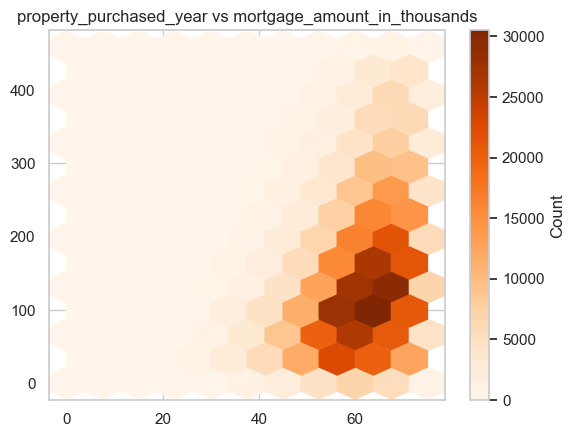

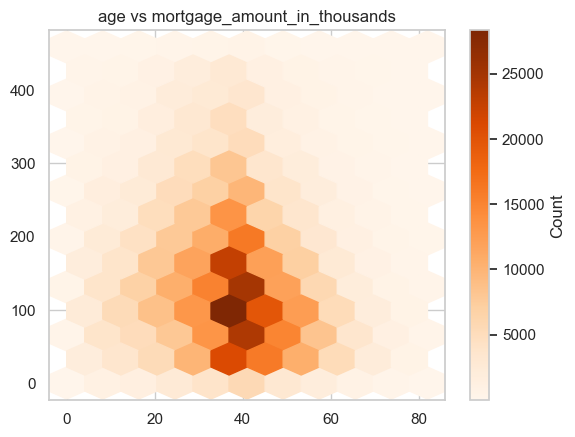

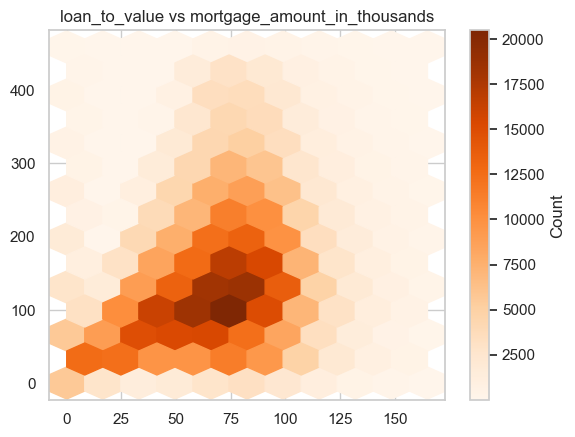

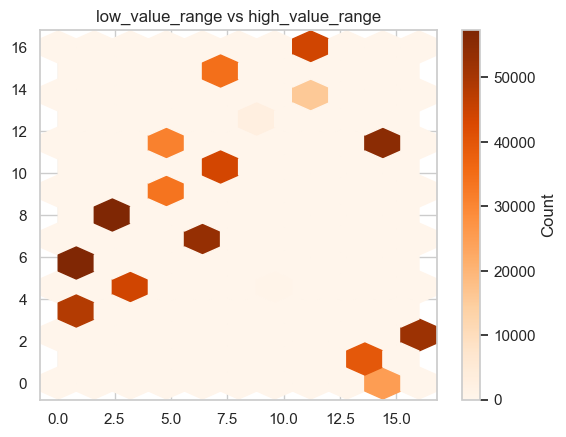

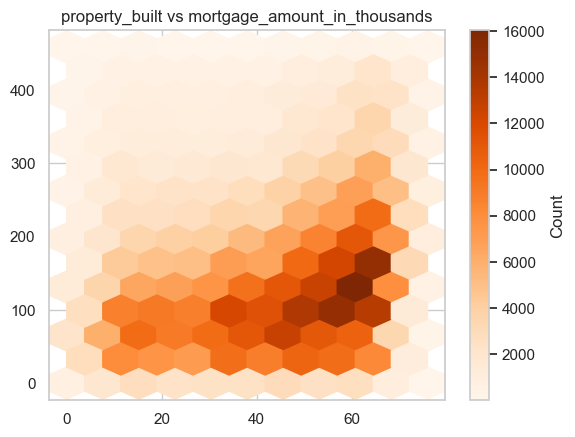

In [217]:
plot_hexbin(data['property_purchased_year'], data['mortgage_amount_in_thousands'], cmap='Oranges')
plot_hexbin(data['age'], data['mortgage_amount_in_thousands'], cmap='Oranges')
plot_hexbin(data['loan_to_value'], data['mortgage_amount_in_thousands'], cmap='Oranges')
plot_hexbin(data['low_value_range'], data['high_value_range'], cmap='Oranges')
plot_hexbin(data['property_built'], data['mortgage_amount_in_thousands'], cmap='Oranges')

## 7 *Data Transformation*

### i. Numerical Data (Z-Score and Min-Max Scalling Data)

In [218]:
data['age'] = (data['age'] - data['age'].mean()) / data['age'].std()
data['loan_to_value'] = (data['loan_to_value'] - data['loan_to_value'].mean()) / data['loan_to_value'].std()

In [219]:
feature = ['property_purchased_year', 'property_built', 'mortgage_amount_in_thousands', 'low_value_range', 'high_value_range']
for f in feature:
    data[f] = (data[f] - data[f].min()) / (data[f].max() - data[f].min())

### ii. String Data (One-Hot Encoding)

In [220]:
feature = ['state', 'property_type', 'gender', 'lender_name', 'interest_type', 'loan_type']

data = pd.get_dummies(data, columns=feature)

In [221]:
data.head(5)

,age,property_purchased_year,property_built,mortgage_amount_in_thousands,loan_to_value,low_value_range,high_value_range,state_AK,state_AL,state_AR,...,interest_type_Adjustable,interest_type_Balloon,interest_type_Fixed,interest_type_U,loan_type_Conventional,loan_type_FHA,loan_type_Private Party Lender,loan_type_S,loan_type_U,loan_type_VA Mortgage
0,-0.808650,0.935065,0.250000,0.309368,-2.169425,0.248497,0.172414,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.268199,0.441558,0.171053,0.084967,2.897454,0.098196,0.068966,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,-1.239390,0.896104,0.828947,0.385621,0.395683,0.398798,0.275862,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1.703999,0.779221,0.486842,0.509804,0.554022,1.000000,1.000000,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0.842519,0.974026,0.342105,0.311547,1.060710,0.248497,0.172414,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## 8 *Correlation Matrices / Heatmap*

### i. Dimensionality Reduction - II

In [231]:
dependent_variable = 'mortgage_amount_in_thousands'
correlations = data.corr()[dependent_variable].abs()
sorted_columns = correlations.sort_values(ascending=False).index
selected_columns = sorted_columns[:15].append(sorted_columns[-15:])
reduced_data = data[selected_columns]
data = reduced_data

data.corr()

,mortgage_amount_in_thousands,low_value_range,high_value_range,loan_to_value,property_purchased_year,property_built,state_ca,interest_type_fixed,interest_type_u,age,...,lender_name_us_bk_national_assn,property_type_u,state_nm,state_vt,state_nd,interest_type_balloon,state_mt,state_me,state_az,state_sd
mortgage_amount_in_thousands,1.000000,0.537344,0.504972,0.269375,0.258660,0.185217,0.168984,-0.145438,0.110078,-0.107304,...,-0.002273,-0.001864,-0.001841,0.000774,-0.000703,0.000509,-0.000351,-0.000231,0.000068,0.000063
low_value_range,0.537344,1.000000,0.969684,-0.227232,0.033020,0.127212,0.308143,-0.090394,0.037085,0.004382,...,0.006110,-0.009497,-0.024953,-0.001496,0.000804,0.001488,0.004804,-0.006610,-0.025365,0.000534
high_value_range,0.504972,0.969684,1.000000,-0.228194,0.027062,0.094990,0.312359,-0.078762,0.026411,0.007577,...,0.005737,-0.008217,-0.023774,-0.001440,-0.000910,0.001755,0.001465,-0.007093,-0.027603,0.000373
loan_to_value,0.269375,-0.227232,-0.228194,1.000000,0.247511,0.054952,-0.070982,-0.108860,0.043321,-0.187183,...,0.018582,-0.004112,0.024892,-0.000060,-0.006581,0.002346,-0.012925,0.002880,0.010222,-0.000853
property_purchased_year,0.258660,0.033020,0.027062,0.247511,1.000000,0.256643,0.037005,-0.138451,0.160840,-0.176784,...,0.018265,0.004563,0.023317,0.000996,0.019315,-0.000227,0.014597,0.012028,0.027775,0.001547
property_built,0.185217,0.127212,0.094990,0.054952,0.256643,1.000000,-0.100999,-0.073507,0.077962,-0.043287,...,0.003570,0.003592,0.014983,-0.000808,0.009566,0.000619,0.004036,-0.000548,0.052009,-0.000106
state_ca,0.168984,0.308143,0.312359,-0.070982,0.037005,-0.100999,1.000000,0.009181,-0.052994,0.020994,...,-0.002822,0.008814,-0.020021,-0.000839,-0.009149,-0.000727,-0.015713,-0.008925,-0.057800,-0.000420
interest_type_fixed,-0.145438,-0.090394,-0.078762,-0.108860,-0.138451,-0.073507,0.009181,1.000000,-0.678732,0.063414,...,-0.018956,0.001815,-0.000844,0.000826,-0.009022,-0.000863,-0.007046,-0.008195,0.004436,-0.000498
interest_type_u,0.110078,0.037085,0.026411,0.043321,0.160840,0.077962,-0.052994,-0.678732,1.000000,-0.088225,...,0.034010,-0.002577,0.007372,-0.001402,0.006652,-0.003699,0.007592,0.009535,0.004361,-0.002136
age,-0.107304,0.004382,0.007577,-0.187183,-0.176784,-0.043287,0.020994,0.063414,-0.088225,1.000000,...,-0.009265,0.002596,0.001791,0.000537,-0.003855,0.000374,-0.000266,-0.003195,0.041114,0.000066


### ii. Heatmap

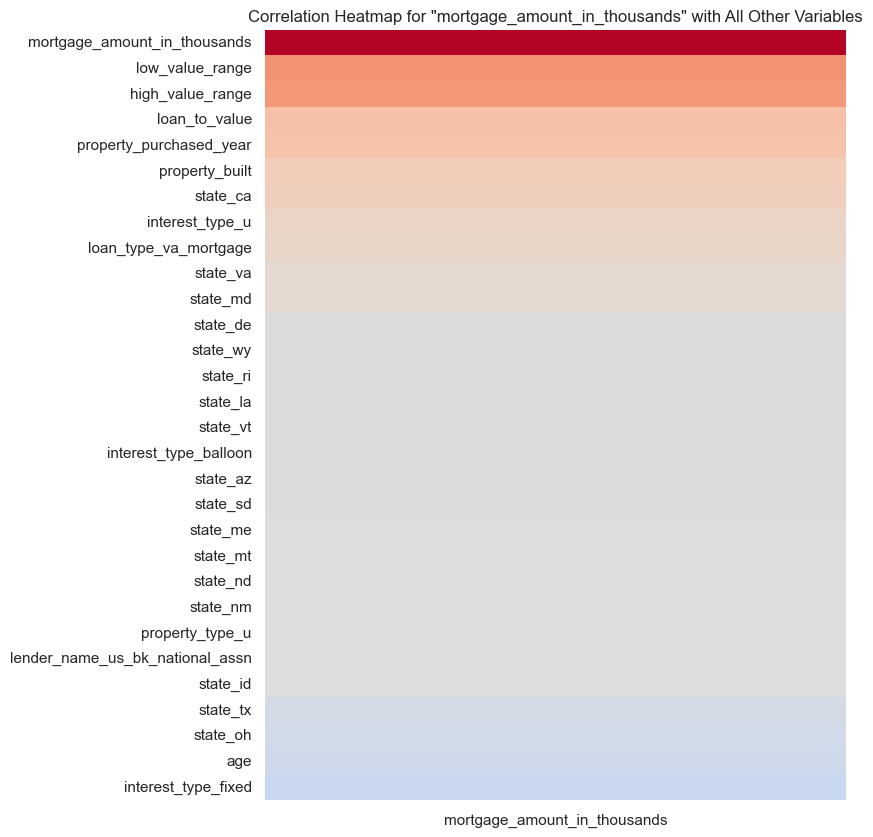

In [232]:
correlation_matrix = data.corr()['mortgage_amount_in_thousands'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(7.5, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation Heatmap for "mortgage_amount_in_thousands" with All Other Variables')
plt.show()

## 8 *Summary*

- **The descriptive analysis of our dataset suggests that the dependent variable, Mortgage Value (y), exhibits a significant dependency on several key factors.** These factors include the type of interest, the age of the buyer, the range of property values, the loan-to-value (LTV) ratio, and the year in which the property was purchased. **These variables are identified as crucial contributors to the variation in mortgage values, indicating that they play a substantial role in determining the outcome variable.**

- **In our efforts to enhance the quality of the data, we observed a considerable amount of noise.** To mitigate this, we undertook measures to remove a substantial number of outliers from the dataset. **This step aimed to improve the robustness and reliability of our analysis by reducing the impact of extreme values that could distort the overall patterns and relationships within the data.**

- **Examining the geographical distribution of buyers, we found that the state with the maximum number of buyers is California (CA).** This insight provides valuable information about the regional concentration of homebuyers and may have implications for targeted marketing or policy considerations.

- **Furthermore, our analysis reveals a prevalent preference among buyers for single-family houses.** This information sheds light on the prevalent choices in the real estate market, emphasizing the popularity of this housing type among the surveyed population.

- **Regarding financing preferences, the data indicates that most individuals opt for the conventional method of obtaining loans.** This finding suggests a preference for traditional lending practices over alternative financing options. **Understanding this preference is essential for financial institutions and policymakers to tailor their offerings to align with the prevailing choices in the market.**

- **In summary, our descriptive analysis highlights the key determinants of Mortgage Value, emphasizes the importance of addressing outliers to improve data quality, identifies regional trends in buyer distribution, underscores the popularity of single-family houses, and notes the prevalent use of conventional loan methods.** These insights provide a foundation for further investigation and decision-making in the real estate and financial sectors.


## 9 *Storing data for next step*

In [233]:
data.to_csv("cleaned_dataset.csv", index=False)

In [234]:
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()
print(f"Rows: {data.shape[0]}\nColumns: {data.shape[1]}")

Rows: 637864
Columns: 30
